In [2]:
import pandas as pd
import numpy as np
import requests
from pandas.io.json import json_normalize

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [18]:
!pip install reverse_geocoder
import reverse_geocoder as rg

  Created wheel for reverse-geocoder: filename=reverse_geocoder-1.5.1-cp37-none-any.whl size=2268094 sha256=fdec12363e3b780336635b75fc6ac0b68bd879743c3c6b8110aa3ea555467178
  Stored in directory: C:\Users\Michael\AppData\Local\pip\Cache\wheels\47\05\50\b1350ff094ef91e082665b4a2f9ca551f8acea4aa55d796b26
Successfully built reverse-geocoder


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
file_name = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv'
df_houses = pd.read_csv(file_name)
df_houses.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Data preparation and cleaning

In [6]:
df_houses = df_houses[["price", "id", "floors", "waterfront","lat", "long","bedrooms", 
                       "sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]
# count NAs
print(df_houses.isna().sum())

price             0
id                0
floors            0
waterfront        0
lat               0
long              0
bedrooms         13
sqft_basement     0
view              0
bathrooms        10
sqft_living15     0
sqft_above        0
grade             0
sqft_living       0
dtype: int64


In [7]:
mean = df_houses['bedrooms'].mean()
df_houses['bedrooms'].replace(np.nan,mean, inplace=True)
mean = df_houses['bathrooms'].mean()
df_houses['bathrooms'].replace(np.nan,mean, inplace=True)
df_houses.head()

,price,id,floors,waterfront,lat,long,bedrooms,sqft_basement,view,bathrooms,sqft_living15,sqft_above,grade,sqft_living
0,221900.0,7129300520,1.0,0,47.5112,-122.257,3.0,0,0,1.00,1340,1180,7,1180
1,538000.0,6414100192,2.0,0,47.7210,-122.319,3.0,400,0,2.25,1690,2170,7,2570
2,180000.0,5631500400,1.0,0,47.7379,-122.233,2.0,0,0,1.00,2720,770,6,770
3,604000.0,2487200875,1.0,0,47.5208,-122.393,4.0,910,0,3.00,1360,1050,7,1960
4,510000.0,1954400510,1.0,0,47.6168,-122.045,3.0,0,0,2.00,1800,1680,8,1680


## Plot the houses on a map

In [8]:
address = 'Seattle, Washington, USA'

geolocator = Nominatim(user_agent="KingCounty_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of King County are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of King County are 47.6038321, -122.3300624.


In [531]:
# create map of China using latitude and longitude values
map_KC = folium.Map(location=[latitude, longitude], zoom_start=8.5)
# df_houses_sample = df_houses.sample(n = 10000)
df_houses_sample = df_houses

In [69]:
# add markers to map
for lat, lng, id_, price in zip(df_houses_sample['lat'], df_houses_sample['long'], 
                                df_houses_sample['id'], df_houses_sample['price']/df_houses_sample['price'].max()):
    label = '{},{}'.format(id_, )
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=price*10,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_KC)  
    
map_KC

In [533]:
subset = df_houses_sample[['lat', 'long']]
coordinates = [tuple(x) for x in subset.to_numpy()]
results = rg.search(coordinates)

In [534]:
borough = pd.DataFrame([x['name'] for x in results], columns=['Borough'], index=df_houses_sample.index)
df_houses_sample = df_houses_sample.join(borough)
df_houses_sample.head()

,price,id,floors,waterfront,lat,long,bedrooms,sqft_basement,view,bathrooms,sqft_living15,sqft_above,grade,sqft_living,Borough
0,221900.0,7129300520,1.0,0,47.5112,-122.257,3.0,0,0,1.00,1340,1180,7,1180,Bryn Mawr-Skyway
1,538000.0,6414100192,2.0,0,47.7210,-122.319,3.0,400,0,2.25,1690,2170,7,2570,Shoreline
2,180000.0,5631500400,1.0,0,47.7379,-122.233,2.0,0,0,1.00,2720,770,6,770,Inglewood-Finn Hill
3,604000.0,2487200875,1.0,0,47.5208,-122.393,4.0,910,0,3.00,1360,1050,7,1960,White Center
4,510000.0,1954400510,1.0,0,47.6168,-122.045,3.0,0,0,2.00,1800,1680,8,1680,City of Sammamish


In [538]:
Avg_price = df_houses_sample.groupby(['Borough']).mean().price
df_avg_price = Avg_price.to_frame('Avg_price').reset_index()

nHouses = df_houses_sample.groupby(['Borough']).count().price
df_nHouses = nHouses.to_frame('Count').reset_index(drop=True)

df_avg_count = df_avg_price.join(df_nHouses)
df_avg_count_restr = df_avg_count[df_avg_count['Count'] > 10]
df_avg_count_restr

,Borough,Avg_price,Count
0,Algona,2.656241e+05,43
1,Ames Lake,7.770697e+05,180
2,Auburn,2.378957e+05,177
3,Bellevue,1.054156e+06,195
4,Black Diamond,3.914773e+05,86
...,...,...,...
74,West Lake Sammamish,8.769751e+05,342
75,White Center,4.251205e+05,1380
76,Woodinville,5.639849e+05,179
77,Woodway,6.827533e+05,45


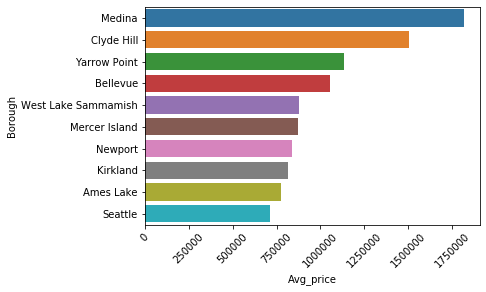

In [536]:
df_avg_price_sort10 = df_avg_count_restr.sort_values('Avg_price', ascending=False).head(10)
ax = sns.barplot(y='Borough', x='Avg_price', data = df_avg_price_sort10)
for price in ax.get_xticklabels():
    price.set_rotation(45)
plt.show()

In [195]:
df_avg_price_sort10

,Borough,Avg_price,Count
47,Medina,2.069796e+06,46
13,Clyde Hill,1.449557e+06,48
77,Yarrow Point,1.201475e+06,101
3,Bellevue,1.013058e+06,102
73,West Lake Sammamish,8.867076e+05,171
53,Newport,8.732541e+05,94
35,Kirkland,8.373388e+05,136
48,Mercer Island,8.301301e+05,225
1,Ames Lake,7.773345e+05,96
76,Woodway,7.072173e+05,26


In [246]:
features = ['floors','waterfront', 'bedrooms','sqft_basement','view','bathrooms','grade','sqft_living','Borough']
df_avg_houses_borough = df_houses_sample.groupby(['Borough']).mean().loc[df_avg_count_restr['Borough'].unique()].reset_index()
df_avg_houses_borough.head()

,Borough,price,id,floors,waterfront,lat,long,bedrooms,sqft_basement,view,bathrooms,sqft_living15,sqft_above,grade,sqft_living
0,Algona,2.612693e+05,5.924625e+09,1.431818,0.0,47.283155,-122.256955,3.335130,63.181818,0.090909,1.959806,1807.909091,1676.590909,7.000000,1739.772727
1,Ames Lake,7.773345e+05,4.201081e+09,1.822917,0.0,47.609935,-121.972073,3.843750,96.614583,0.156250,2.837143,3089.479167,3119.020833,9.208333,3215.635417
2,Auburn,2.371495e+05,5.294327e+09,1.273256,0.0,47.304250,-122.216919,3.302326,155.813953,0.069767,1.770349,1463.302326,1529.430233,6.767442,1685.244186
3,Bellevue,1.013058e+06,4.180690e+09,1.441176,0.0,47.614128,-122.189118,3.578431,385.196078,0.107843,2.350490,2410.490196,2152.598039,8.450980,2537.794118
4,Black Diamond,4.192619e+05,3.475497e+09,1.440476,0.0,47.303781,-122.019833,3.238095,240.357143,0.190476,2.065476,2185.833333,2005.285714,7.619048,2245.642857


### Connect to Foursquare API

In [247]:
CLIENT_ID = 'DRALVCCVRZZQGZE20FNIG2IR24WZ1JH2UWCQAWBOYCELZO53' # your Foursquare ID
CLIENT_SECRET = 'C4PAYQMLWI0O5X00I5R3OMGFWIWZXUU1Q2AIBQGU51Z3VQYX' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: DRALVCCVRZZQGZE20FNIG2IR24WZ1JH2UWCQAWBOYCELZO53
CLIENT_SECRET:C4PAYQMLWI0O5X00I5R3OMGFWIWZXUU1Q2AIBQGU51Z3VQYX


In [526]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000, LIMIT=1000):

    venues_list=[]
    for x, (name, lat, lng) in enumerate(zip(names, latitudes, longitudes)):
        print('Currently at {:2.1%}, {}'.format(x/len(names), name), end="\r")        
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
                
        # make the GET request
        try:
            results = requests.get(url).json()["response"]['groups'][0]['items']
        except:
            continue
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude',
                  'Venue Category']
    print('Finished')
    return(nearby_venues)

In [527]:
venues = getNearbyVenues(names=df_avg_houses_borough['Borough'],
                           latitudes=df_avg_houses_borough['lat'],
                           longitudes=df_avg_houses_borough['long'])

Finishedy at 98.6%, Yarrow PointmmamishHillre


In [542]:
venues['Venue Category'].unique()

array(['Food', 'Rock Club', 'Bar', 'Convenience Store', 'Pizza Place',
       'Construction & Landscaping', 'Flower Shop', 'Home Service',
       'Gift Shop', 'Farm', 'American Restaurant', 'Coffee Shop',
       'Brewery', 'Sushi Restaurant', 'Ice Cream Shop', 'Thai Restaurant',
       'Italian Restaurant', 'Café', 'Park', 'Dive Bar',
       'Automotive Shop', 'Vietnamese Restaurant', 'Storage Facility',
       'Sandwich Place', 'Grocery Store', 'Noodle House', 'Bank',
       'Fast Food Restaurant', 'Mexican Restaurant',
       'Performing Arts Venue', 'Breakfast Spot', 'Recreation Center',
       'Japanese Restaurant', 'Thrift / Vintage Store', 'Gas Station',
       'Smoke Shop', 'Football Stadium', 'Adult Boutique', 'Steakhouse',
       'Sporting Goods Shop', 'Boutique', 'Toy / Game Store',
       'Dessert Shop', 'Wine Shop', 'Gym', 'Sports Bar', 'Shopping Mall',
       'Seafood Restaurant', 'Bagel Shop', 'Bakery', 'Hotpot Restaurant',
       'Furniture / Home Store', 'Cupcake Shop',

In [523]:
venues.groupby(["Borough"])['Venue Category'].count()

Borough
Algona                        2
Auburn                        5
Bellevue                     44
Bothell                      45
Brier                         2
Bryn Mawr-Skyway              2
Burien                       23
Carnation                    14
City of Sammamish             5
Clyde Hill                    2
Cottage Lake                  1
Des Moines                    1
Duvall                        2
East Hill-Meridian            1
Eastgate                     19
Enumclaw                      2
Esperance                     3
Fairwood                      2
Fall City                     3
Fife Heights                  1
Inglewood-Finn Hill           2
Issaquah                     19
Kenmore                      20
Kent                          4
Kingsgate                     4
Kirkland                      7
Klahanie                      1
Lake Forest Park             11
Lake Marcel-Stillwater        1
Lakeland North                2
Lakeland South                1


### See the relationship between number of restaurants, studios and average price

In [552]:
#Restaurants
countRestaurants = []
for a in venues.groupby(["Borough"])['Venue Category']:
    countRestaurants.append([a[0], (sum('Restaurant' in s for s in a[1]))])
df_countRestaurants = pd.DataFrame(countRestaurants, columns={"Borough", "numRestaurants"})
df_price_numRestaurants = pd.merge(df_avg_count_restr[['Borough', 'Avg_price']], df_countRestaurants, on='Borough')
print(df_price_numRestaurants.corr())

# Studios
countStudio = []
for a in venues.groupby(["Borough"])['Venue Category']:
    countStudio.append([a[0], (sum('Studio' in s for s in a[1]))])
df_countStudio = pd.DataFrame(countStudio, columns={"Borough", "numStudios"})
df_price_numStudios = pd.merge(df_avg_count_restr[['Borough', 'Avg_price']], df_countStudio, on='Borough')
print(df_price_numStudios.corr())

# Bar
countBars = []
for a in venues.groupby(["Borough"])['Venue Category']:
    countBars.append([a[0], (sum('Bar' in s for s in a[1]))])
df_countBars = pd.DataFrame(countBars, columns={"Borough", "numBars"})
df_price_numBars = pd.merge(df_avg_count_restr[['Borough', 'Avg_price']], df_countBars, on='Borough')
print(df_price_numBars.corr())

                Avg_price  numRestaurants
Avg_price        1.000000        0.087447
numRestaurants   0.087447        1.000000
            Avg_price  numStudios
Avg_price    1.000000    0.038924
numStudios   0.038924    1.000000
           Avg_price   numBars
Avg_price   1.000000  0.068435
numBars     0.068435  1.000000


In [553]:
print('There are {} uniques categories.'.format(len(venues['Venue Category'].unique())))

There are 257 uniques categories.


In [560]:
df_houses_sample = pd.merge(df_houses_sample, df_countRestaurants, on='Borough')
df_houses_sample = pd.merge(df_houses_sample, df_countStudio, on='Borough')
df_houses_sample = pd.merge(df_houses_sample, df_countBars, on='Borough')
df_houses_sample

,price,id,floors,waterfront,lat,long,bedrooms,sqft_basement,view,bathrooms,sqft_living15,sqft_above,grade,sqft_living,Borough,numRestaurants,numStudios,numBars
0,221900.0,7129300520,1.0,0,47.5112,-122.257,3.0,0,0,1.00,1340,1180,7,1180,Bryn Mawr-Skyway,0,0,0
1,2000000.0,2524049179,1.0,0,47.5316,-122.233,3.0,720,4,2.75,4110,2330,9,3050,Bryn Mawr-Skyway,0,0,0
2,205425.0,4060000240,1.0,0,47.5009,-122.248,2.0,0,0,1.00,1190,880,6,880,Bryn Mawr-Skyway,0,0,0
3,445000.0,3524049083,1.5,0,47.5299,-122.266,4.0,380,0,1.75,1850,1720,7,2100,Bryn Mawr-Skyway,0,0,0
4,445000.0,4058801670,1.0,0,47.5091,-122.244,3.0,480,2,2.25,2660,1620,8,2100,Bryn Mawr-Skyway,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21510,499160.0,8956200990,2.0,0,47.2904,-122.264,4.0,0,0,2.50,2849,2628,9,2628,Algona,0,0,1
21511,447500.0,8956200070,2.0,0,47.3003,-122.263,4.0,0,0,2.50,2725,2425,9,2425,Algona,0,0,1
21512,457000.0,8956200530,2.0,0,47.2958,-122.265,4.0,0,0,2.50,2597,2820,9,2820,Algona,0,0,1
21513,549950.0,8956200770,2.0,0,47.2931,-122.264,4.0,0,2,3.50,2673,3906,9,3906,Algona,0,0,1


In [583]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# import statistical tools for estimation
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

In [591]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living", "numRestaurants", "numStudios", "numBars"]
features0 =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
X = df_houses_sample[features]
Y = df_houses_sample['price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [598]:
# Linear regression
lm = LinearRegression()
lm.fit(X_train, Y_train)
Y_hat = lm.predict(X_test)
lm_mse = mean_squared_error(Y_hat, Y_test)
print('Mean squared error of Linear Regression is',lm_mse)

# Ridge regression
RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(X_train, Y_train)
Y_hat = RidgeModel.predict(X_test)
RidgeModel_mse = mean_squared_error(Y_hat, Y_test)
print('Mean squared error of Ridge Regression is',RidgeModel_mse)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=50, random_state=1)
rf_model.fit(X_train, Y_train)
Y_hat = rf_model.predict(X_test)
rf_mse = mean_squared_error(Y_hat, Y_test)
print('Mean squared error of Random Forest is', rf_mse)

Mean squared error of Linear Regression is 36287756175.402084
Mean squared error of Ridge Regression is 36301352322.76263
Mean squared error of Random Forest is 20163391064.38588


In [599]:
lm.coef_

array([-5.52094410e+04,  6.81605058e+05,  6.39043884e+05, -2.31188742e+04,
       -5.85310242e+15,  6.01744706e+04,  4.86328048e+03,  1.91908378e+01,
       -5.85310242e+15,  7.37658809e+04,  5.85310242e+15,  1.22758933e+03,
       -7.45298822e+04,  3.81894405e+04])

### How are the results without venue data?

In [600]:
# Linear regression
lm = LinearRegression()
lm.fit(X_train[features0], Y_train)
Y_hat = lm.predict(X_test[features0])
lm_mse = mean_squared_error(Y_hat, Y_test)
print('Mean squared error of Linear Regression is',lm_mse)

# Ridge regression
RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(X_train[features0], Y_train)
Y_hat = RidgeModel.predict(X_test[features0])
RidgeModel_mse = mean_squared_error(Y_hat, Y_test)
print('Mean squared error of Ridge Regression is',RidgeModel_mse)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=50, random_state=1)
rf_model.fit(X_train[features0], Y_train)
Y_hat = rf_model.predict(X_test[features0])
rf_mse = mean_squared_error(Y_hat, Y_test)
print('Mean squared error of Random Forest is', rf_mse)

Mean squared error of Linear Regression is 39713488749.36912
Mean squared error of Ridge Regression is 39702389401.650505
Mean squared error of Random Forest is 21442270108.81632


In [595]:
lm.coef_

array([-2.61028134e+04,  6.43370943e+05,  6.72806342e+05, -2.65154654e+04,
       -4.72823201e+15,  6.72204283e+04, -2.36948289e+03,  2.50211439e-01,
       -4.72823201e+15,  8.13961890e+04,  4.72823201e+15])

In [556]:
count_df = venues.groupby(['Borough', 'Venue Category']).count().Latitude
count_df2 = count_df.to_frame('Count').reset_index()
df_count_price = pd.merge(count_df2, df_avg_count_restr[['Borough','Avg_price']], on='Borough')
df_count_price
#sum('Restaurant' in s for s in df_count_price['Venue Category'])
#one hot encoding
# venues_onehot = pd.get_dummies(df_count_price['Venue Category'], prefix="", prefix_sep="")

# venues_onehot['Borough'] = df_count_price['Borough']
# venues_onehot['price'] = df_count_price['Avg_price']

# fixed_columns = [venues_onehot.columns[-1]] + list(venues_onehot.columns[:-1])
# venues_onehot = venues_onehot[fixed_columns]
# fixed_columns = [venues_onehot.columns[-1]] + list(venues_onehot.columns[:-1])
# venues_onehot = venues_onehot[fixed_columns]

# venues_onehot.corr().price.sort_values(ascending=False)

,Borough,Venue Category,Count,Avg_price
0,Algona,Bar,1,2.656241e+05
1,Algona,Construction & Landscaping,1,2.656241e+05
2,Algona,Convenience Store,1,2.656241e+05
3,Algona,Flower Shop,1,2.656241e+05
4,Algona,Food,1,2.656241e+05
...,...,...,...,...
1130,Woodway,Playground,2,6.827533e+05
1131,Woodway,Scenic Lookout,1,6.827533e+05
1132,Woodway,Thai Restaurant,1,6.827533e+05
1133,Yarrow Point,Beach,1,1.132726e+06


In [420]:
# one hot encoding
seattle_onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
seattle_onehot['Neighborhood'] = venues['Borough'] 

# move neighborhood column to the first column
fixed_columns = [seattle_onehot.columns[-1]] + list(seattle_onehot.columns[:-1])
seattle_onehot = seattle_onehot[fixed_columns]

seattle_onehot['Garden'].sum()

9

In [425]:
seattle_grouped = seattle_onehot.groupby('Neighborhood').mean().reset_index()
seattle_grouped.join(df_avg_count_restr[['Borough', 'Avg_price']], on='Borough')

KeyError: 'Borough'

In [427]:
# Returns most common venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [428]:
num_top_venues = 25

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = seattle_grouped['Neighborhood']

for ind in np.arange(seattle_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(seattle_grouped.iloc[ind, :], num_top_venues)

top20 = neighborhoods_venues_sorted[neighborhoods_venues_sorted['Neighborhood'].isin(df_avg_count_restr['Borough'])]

In [399]:
df_top3 = pd.get_dummies(top20[['1st Most Common Venue', '2nd Most Common Venue', '3rd Most Common Venue']])
df_top3['Neighborhood'] = neighborhoods_venues_sorted['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [df_top3.columns[-1]] + list(df_top3.columns[:-1])
df_top3 = df_top3[fixed_columns]
df_top3['price'] = df_avg_count_restr['Avg_price']
df_top3.corr().sort_values('price', ascending=False)['price']

price                                       1.000000
1st Most Common Venue_Wine Bar              0.414572
2nd Most Common Venue_Winery                0.414572
2nd Most Common Venue_Mexican Restaurant    0.291246
3rd Most Common Venue_Trail                 0.283976
                                              ...   
2nd Most Common Venue_Clothing Store       -0.121777
2nd Most Common Venue_Coffee Shop          -0.130965
3rd Most Common Venue_Golf Course          -0.136442
3rd Most Common Venue_Café                 -0.136795
3rd Most Common Venue_Wine Bar                   NaN
Name: price, Length: 76, dtype: float64

[-0.08852647237537743,
 0.06935459294999989,
 0.147626651929438,
 -0.04123137850345399,
 0.0729165778777016,
 -0.07368851439093406,
 -0.12973691700242615,
 -0.0877569500309712,
 nan,
 0.04217275264587274,
 -0.09451582610511401,
 0.01008102668703083,
 0.12260487607286473,
 -0.12229441363508828,
 0.12146303391943311,
 -0.026871744517150842,
 -0.10268742605030615,
 -0.10570344788680656,
 -0.11407348231570663,
 -0.10355651462187494,
 0.2454749429985607,
 0.005232062728251622,
 -0.08253726309258752,
 nan,
 -0.0862120764232119,
 -0.10366745712392748,
 0.414571857445843,
 0.005578898652345217,
 -0.09027987793764022,
 -0.012806928626859627,
 -0.03346010834318013,
 -0.02536339724276956,
 0.14448345426179418,
 0.0015340139851507853,
 -0.08955281022870512,
 0.13601221789334786,
 -0.07229168037720332,
 0.00040976157753478055,
 -0.0808133762467488,
 -0.07177310477036793,
 -0.03346010834318013,
 -0.016169331155876824,
 -0.0877569500309712,
 -0.08253726309258752,
 0.01228562443945681,
 -0.00838621425